<a href="https://colab.research.google.com/github/seohii66/seohii66/blob/main/%5BDM%5D_3%EC%9E%A5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98_%EC%88%98%EC%A7%91%2C_%ED%83%90%EA%B5%AC%2C_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## * 데이터 소스의 형태와 pandas에 데이터 적재하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sqlite3
sqlite_file = '/content/drive/MyDrive/dmdata/boston.db'

# 데이터베이스 파일에 접속하기 
conn = sqlite3.connect(sqlite_file)

# 커서 객체 초기화
cur = conn.cursor()

# 횡단 검색 정의
cur.execute("select * from boston limit 5;")

# 데이터 가져오기와 인쇄
data = cur.fetchall()
print(data)

[(0, 0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98, 24.0), (1, 0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6), (2, 0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7), (3, 0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4), (4, 0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2)]


In [ ]:
# zn 열에서 선택하고 이전에 사용됐던 값에 대해서만 필터링한다
cur.execute("select ZN from boston where ZN > 0.0")
data = cur.fetchall()
print(data)

[(18.0,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (75.0,), (75.0,), (21.0,), (21.0,), (21.0,), (21.0,), (75.0,), (90.0,), (85.0,), (100.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (17.5,), (80.0,), (80.0,), (12.5,), (12.5,), (12.5,), (25.0,), (25.0,), (25.0,), (25.0,), (28.0,), (28.0,), (28.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (60.0,), (60.0,), (80.0,), (80.0,), (80.0,), (80.0,), (95.0,), (95.0,), (82.5,), (82.5,), (95.0,), (95.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (80.0,), (80.0,), (90.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (40.0,), (40.0,), (40.0,), (40.0,), (40.0,), (20.0,), (20.0,), (20.0,), (20.0,), (90.0,), (90.0,), (55.0,), (80.0,), (52.5,), (52.5,), (52.5,), (80.0,), (80.0,), (80.0,), (70.0,),

In [ ]:
import pandas as pd

# boston 테이블에서 다섯 개 행의 모든 데이터를 가져오기
df = pd.read_sql_query("select * from boston limit 5;",conn)
print("df.shape() = "+str(df.shape))

df.shape() = (5, 15)


In [ ]:
# boston 테이블에 있는 모든 데이터 가져오기
df = pd.read_sql_query("select * from boston;",conn)
print("df.shape = " + str(df.shape))
print("Sanity check with Pandas head():")
print(df.head())
print("Summarize with Pandas describe(): ")
print(df.describe().transpose())

df.shape = (506, 15)
Sanity check with Pandas head():
   record     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0       0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Summarize with Pandas describe(): 
         count        mean         std        min         25%        50%  \
record   506.0  252.500000  146.213884    0.00000  126.250000  252.50000   
CRIM     506.0    3.593761    8.596783    0.00632    0.082045    0.2

In [ ]:
# 양의 ZN 값을 갖는 boston 테이블 내의 모든 데이터 가져오기
df = pd.read_sql_query("select * from boston where ZN > 0.0;", conn)
print("df.shape = "+str(df.shape))

df.shape = (134, 15)


In [ ]:
# 250이상의 값을 갖는 모든 데이터 가져오기
df = pd.read_sql_query("select * from boston where ZN > 0.0 and record > 250;",conn)
print("df.shape = "+str(df.shape))

df.shape = (66, 15)


In [ ]:
# 여러 줄로 나눠 쓰는 검색 구문의 예

df = pd.read_sql_query("""
select record, ZN,AGE, TAX from boston where ZN > 0.0 and CRIM <2.5;
""",
conn)

In [ ]:
# 수정 사항을 저ㅇ장하기 위해 pandas의 to_sql 명령어 사용

df.to_sql("/content/drive/MyDrive/dmdata/boston_updated", conn, if_exists = "replace")

 # 접속 종료
conn.close()

##### 디스크에서 데이터 불러오기

In [ ]:
# 파일로부터 데이터 로딩하기
df = pd.read_csv('/content/drive/MyDrive/dmdata/iris.csv')

In [ ]:
# 데이터 프레임에서의 변화를 디스크에 저장

df.index.name = "record"
df['species']= "new-species"
print(df.head())

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      5.1                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      4.7                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm      species  
record                                  
0                     0.2  new-species  
1                     0.2  new-species  
2                     0.2  new-species  
3                     0.2  new-species  
4                     0.2  new-species  


In [ ]:
# url 웹소스에서 데이터 찾기
url = "https://archive.....
names = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm ', 'species']
df = pd.read_csv(url, names = names)

In [ ]:
# scikit-learn으로부터 데이터 불러오기

from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['species'] = dataset.target

In [ ]:
# seaborn으로부터 데이터불러오기

import seaborn as sns
df = sns.load_dataset("flights")

##pandas로 데이터 접근, 검색, 점검하기
 - pandas 는 사용자를 도와주는 검색 및 필터 기능을 기본으로 내장하고 있다

 

In [ ]:
import pandas as pd
import sqlite3
sqlite_file = '/content/drive/MyDrive/dmdata/boston.db'

# 데이터베이스 파일에 접속
conn = sqlite3.connect(sqlite_file)

df =pd.read_sql_query("select * from boston;",conn)
print("df.shape =" + str(df.shape))
df.set_index("record", inplace = True)
conn.close()
print(df.head())

df.shape =(506, 15)
           CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                       
0       0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
0          15.3  396.90   4.98  24.0  
1          17.8  396.90   9.14  21.6  
2          17.8  392.83   4.03  34.7  
3          18.7  394.63   2.94  33.4  
4          18.7  396.90   5.33  36.2  


In [ ]:
print(df.shape)

(506, 14)


In [ ]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [ ]:
# 통계량 요약확인
df.describe()
# 전치 행렬 형태로 확인
print(df.describe().transpose())

         count        mean         std        min         25%        50%  \
CRIM     506.0    3.593761    8.596783    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

In [ ]:
# 최댓값, 최솟값 확인
df.max()
df.min()

# 평균과 중앙값 확인
df.mean()
print(df.median())

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64


In [ ]:
# 최댓값과 최솟값의 인덱스 확인
df.idxmax()
print(df.idxmax())

CRIM       380
ZN          57
INDUS      488
CHAS       142
NOX        142
RM         364
AGE          8
DIS        353
RAD        356
TAX        488
PTRATIO    354
B            0
LSTAT      374
MEDV       161
dtype: int64


In [ ]:
# 데이터의 첫번째행 구하기
df.loc[0]

 #데이터의 세번째 행 
df.loc[2]

# CRIM 열의 첫번째 행 구하기
print(df.loc[0]['CRIM'])

0.00632


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# 단일 열 분리하기
df['AGE'].mean()

68.57490118577078

In [ ]:
df['MEDV'].idxmax()

161

In [ ]:
print(df['AGE'].idxmin())

41


- by 옵션을 사용해서 특정 열에 따라 정렬 가능

In [ ]:
# 오름차순 정렬
df.sort_values(by= 'ZN')
# 내림차순 정렬
df.sort_values(by = 'ZN', ascending = False)


print(df.sort_values(by = 'ZN', ascending = False).head())

           CRIM     ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                         
57      0.01432  100.0   1.32   0.0  0.4110  6.816  40.5  8.3248  5.0  256.0   
204     0.02009   95.0   2.68   0.0  0.4161  8.034  31.9  5.1180  4.0  224.0   
203     0.03510   95.0   2.68   0.0  0.4161  7.853  33.2  5.1180  4.0  224.0   
200     0.01778   95.0   1.47   0.0  0.4030  7.135  13.9  7.6534  3.0  402.0   
199     0.03150   95.0   1.47   0.0  0.4030  6.975  15.3  7.6534  3.0  402.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
57         15.1  392.90   3.95  31.6  
204        14.7  390.55   2.88  50.0  
203        14.7  392.78   3.81  48.5  
200        17.0  384.30   4.45  32.9  
199        17.0  396.90   4.56  34.9  


- inplace 옵션을 사용해서 메모리에 저장돼있는 데이터를 영구적으로 정렬

In [ ]:
# 테이블을 영구적으로 정렬
df.sort_values(by = 'ZN', inplace = True)

# 영구적으로 정렬된 테이블에서 df.head() 불러오기
print(df.head())

           CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                      
505     0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
2       0.02729  0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       0.03237  0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
5       0.02985  0.0   2.18   0.0  0.458  6.430  58.7  6.0622  3.0  222.0   
13      0.62976  0.0   8.14   0.0  0.538  5.949  61.8  4.7075  4.0  307.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
505        21.0  396.90   7.88  11.9  
2          17.8  392.83   4.03  34.7  
3          18.7  394.63   2.94  33.4  
5          18.7  394.12   5.21  28.7  
13         21.0  396.90   8.26  20.4  


In [ ]:
# 원래 인덱스로 정렬
df.sort_values(by= 'record', inplace = True)
print(df.head())

           CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
record                                                                       
0       0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

        PTRATIO       B  LSTAT  MEDV  
record                                
0          15.3  396.90   4.98  24.0  
1          17.8  396.90   9.14  21.6  
2          17.8  392.83   4.03  34.7  
3          18.7  394.63   2.94  33.4  
4          18.7  396.90   5.33  36.2  


In [ ]:
# 짝수 레코드만 보여주도록 데이터프레임 필터 적용
df[df.index % 2 == 0]

# 95세 이상만 보여주도록 데이터프레임 필터 적용
df[df['AGE']>95]

# 필터가 적용된 테이블의 통계량 요약jjjjjjjj
df[df['AGE']>95].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,111.0,9.131193,12.525663,0.09849,1.20826,5.87205,11.7645,73.5341
ZN,111.0,0.585586,3.125317,0.00000,0.00000,0.00000,0.0000,20.0000
INDUS,111.0,17.862342,4.606760,2.46000,18.10000,18.10000,19.5800,27.7400
CHAS,111.0,0.063063,0.244179,0.00000,0.00000,0.00000,0.0000,1.0000
NOX,111.0,0.664649,0.093411,0.44800,0.60500,0.65900,0.7000,0.8710
RM,111.0,5.940144,0.712860,3.86300,5.49400,6.00600,6.4030,7.9290
AGE,111.0,98.280180,1.657864,95.20000,96.95000,98.40000,100.0000,100.0000
DIS,111.0,1.999828,0.873839,1.13700,1.52335,1.80260,2.1088,6.0821
RAD,111.0,15.153153,9.832412,2.00000,5.00000,24.00000,24.0000,24.0000
TAX,111.0,541.459459,156.998482,188.00000,403.00000,666.00000,666.0000,711.0000


### seaborn 에서의 기본적 플롯

In [ ]:
import seaborn as sns
sns.plot_type(data)

### * 스캐터 플롯 scatter plot
 두 변수에 대한 플롯을 사용해서 두 변수 사이의 관계를 시각화하는 방법
  - lmplot() : 데이터를 선형 회귀 분석으로 적합시키고 그걸 그려주는 fit_reg 옵션을 포함한 몇몇 기능이 더 있다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# iris 데이터 로딩
df = pd.read_csv('/content/drive/MyDrive/dmdata/iris.csv')


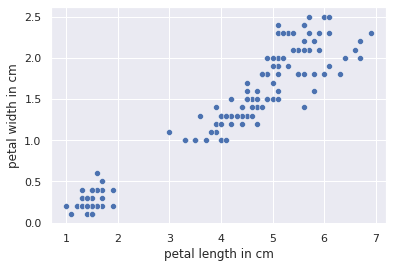

In [ ]:
# scatter plot
sns.scatterplot(x = 'petal length in cm', y = 'petal width in cm', data = df)

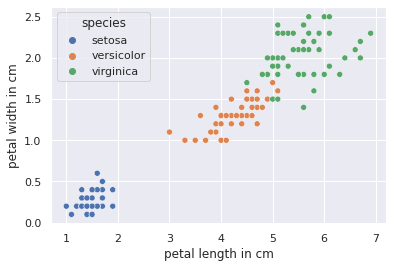

In [ ]:
# hue 옵션을 써서 범례를 만든다
sns.scatterplot(x = 'petal length in cm', y = 'petal width in cm', hue = 'species',data = df)

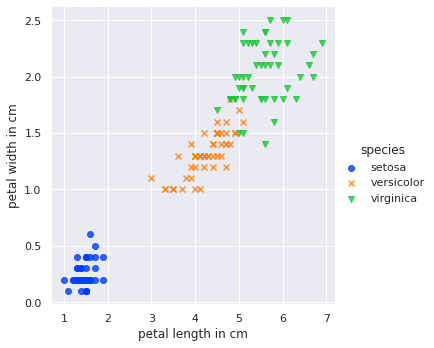

In [ ]:
# lmplot 에서 fit_leg = False
 
sns.lmplot(x = 'petal length in cm', y = 'petal width in cm', hue = 'species', data = df, fit_reg = False, palette = 'bright', markers = ['o','x','v'])

### * 히스토그램 
빈도분포를 나타내는 시각화
- 막대그래프와 비슷하지만 '단일 변수'를 다루고, 'y축은 빈도를 표시'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


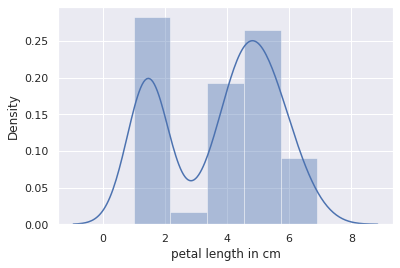

In [ ]:
# 히스토그램
sns.distplot(df['petal length in cm'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


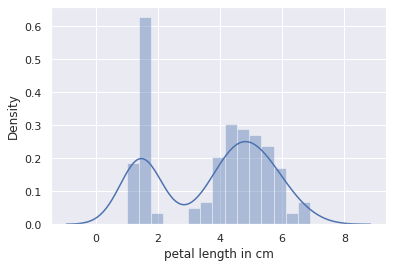

In [ ]:
# 15개의 막대가 있는 히스토그램
sns.distplot(df['petal length in cm'],bins = 15)

### * 조인트 플롯 
스캐터 플롯 + 히스토그램

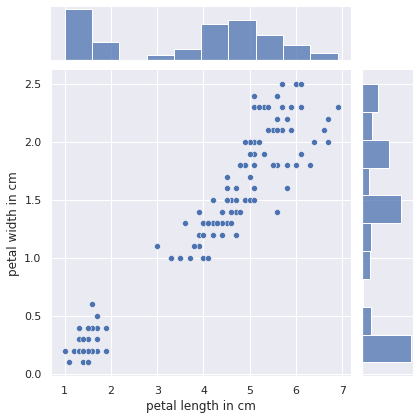

In [ ]:
# 조인트 플롯
sns.jointplot(x = 'petal length in cm', y = 'petal width in cm', data = df, kind = 'scatter', marginal_kws = dict(bins = 10))

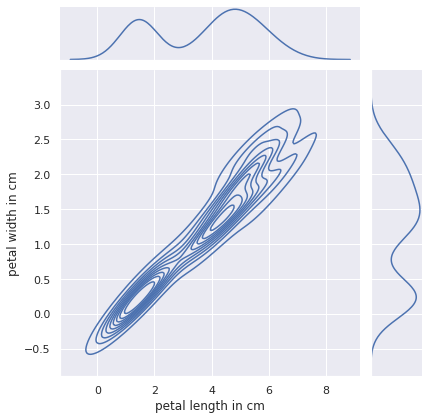

In [ ]:
# 밀도 추정치를 사용한 조인트 플롯
sns.jointplot(x = 'petal length in cm', y = 'petal width in cm', data = df, kind= 'kde')

### * 바이올린 플롯
 클래스별로 나눠진 단일변수의 분포를 보여주는 가장 효율적인 플롯 중 하나
 - 바이올린 플롯의 장점은 **다른 변수에 대해 같은 모양의 바이올린**을 플롯 할 때 잘 드러난다

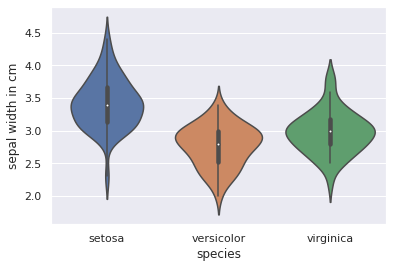

In [ ]:
# 바이올린 플롯
sns.violinplot(x = 'species', y = 'sepal width in cm', data = df)

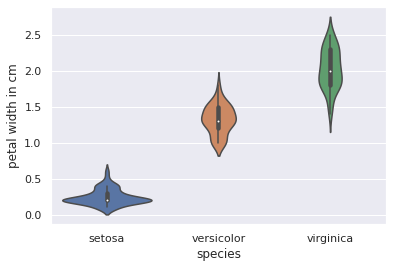

In [ ]:
sns.violinplot(x= 'species', y = 'petal width in cm', data = df)

 => petal의 너비에 대한 바이올린 플롯이 sepal의 너비에 대한 바이올리 플롯보다 바이올린 사이의 구별이 더욱 확실히 되는 것을 볼 수 있다.

- 각 바이올린 = 클래스
- 따라서, petal의 너비 변수는 한 클래스를 다른 클래스와 구별하는 데 유용하다

### * 페어플롯
복수의 변수들의 스캐터 플롯을 각각의 조합에 대해 보여주고, 대각선으로는 히스토그램을 보여준다.
- 변수들간의 관계를 잘 모르는 새로운 데이터를 탐구하는 좋은 방법
- 문제에 친숙하지 않을 때 데이터 탐구 단계를 시작하는 것으로 적합


- 하지만, 특징의 개수가 너무 많아지는 경우 , 정보가 넘치게 됨
            -=변수의 수를 줄이기 위해 pandas의 리스트 기반 열 접근을 사용해서 실용적인 플롯을 만들 수 있다

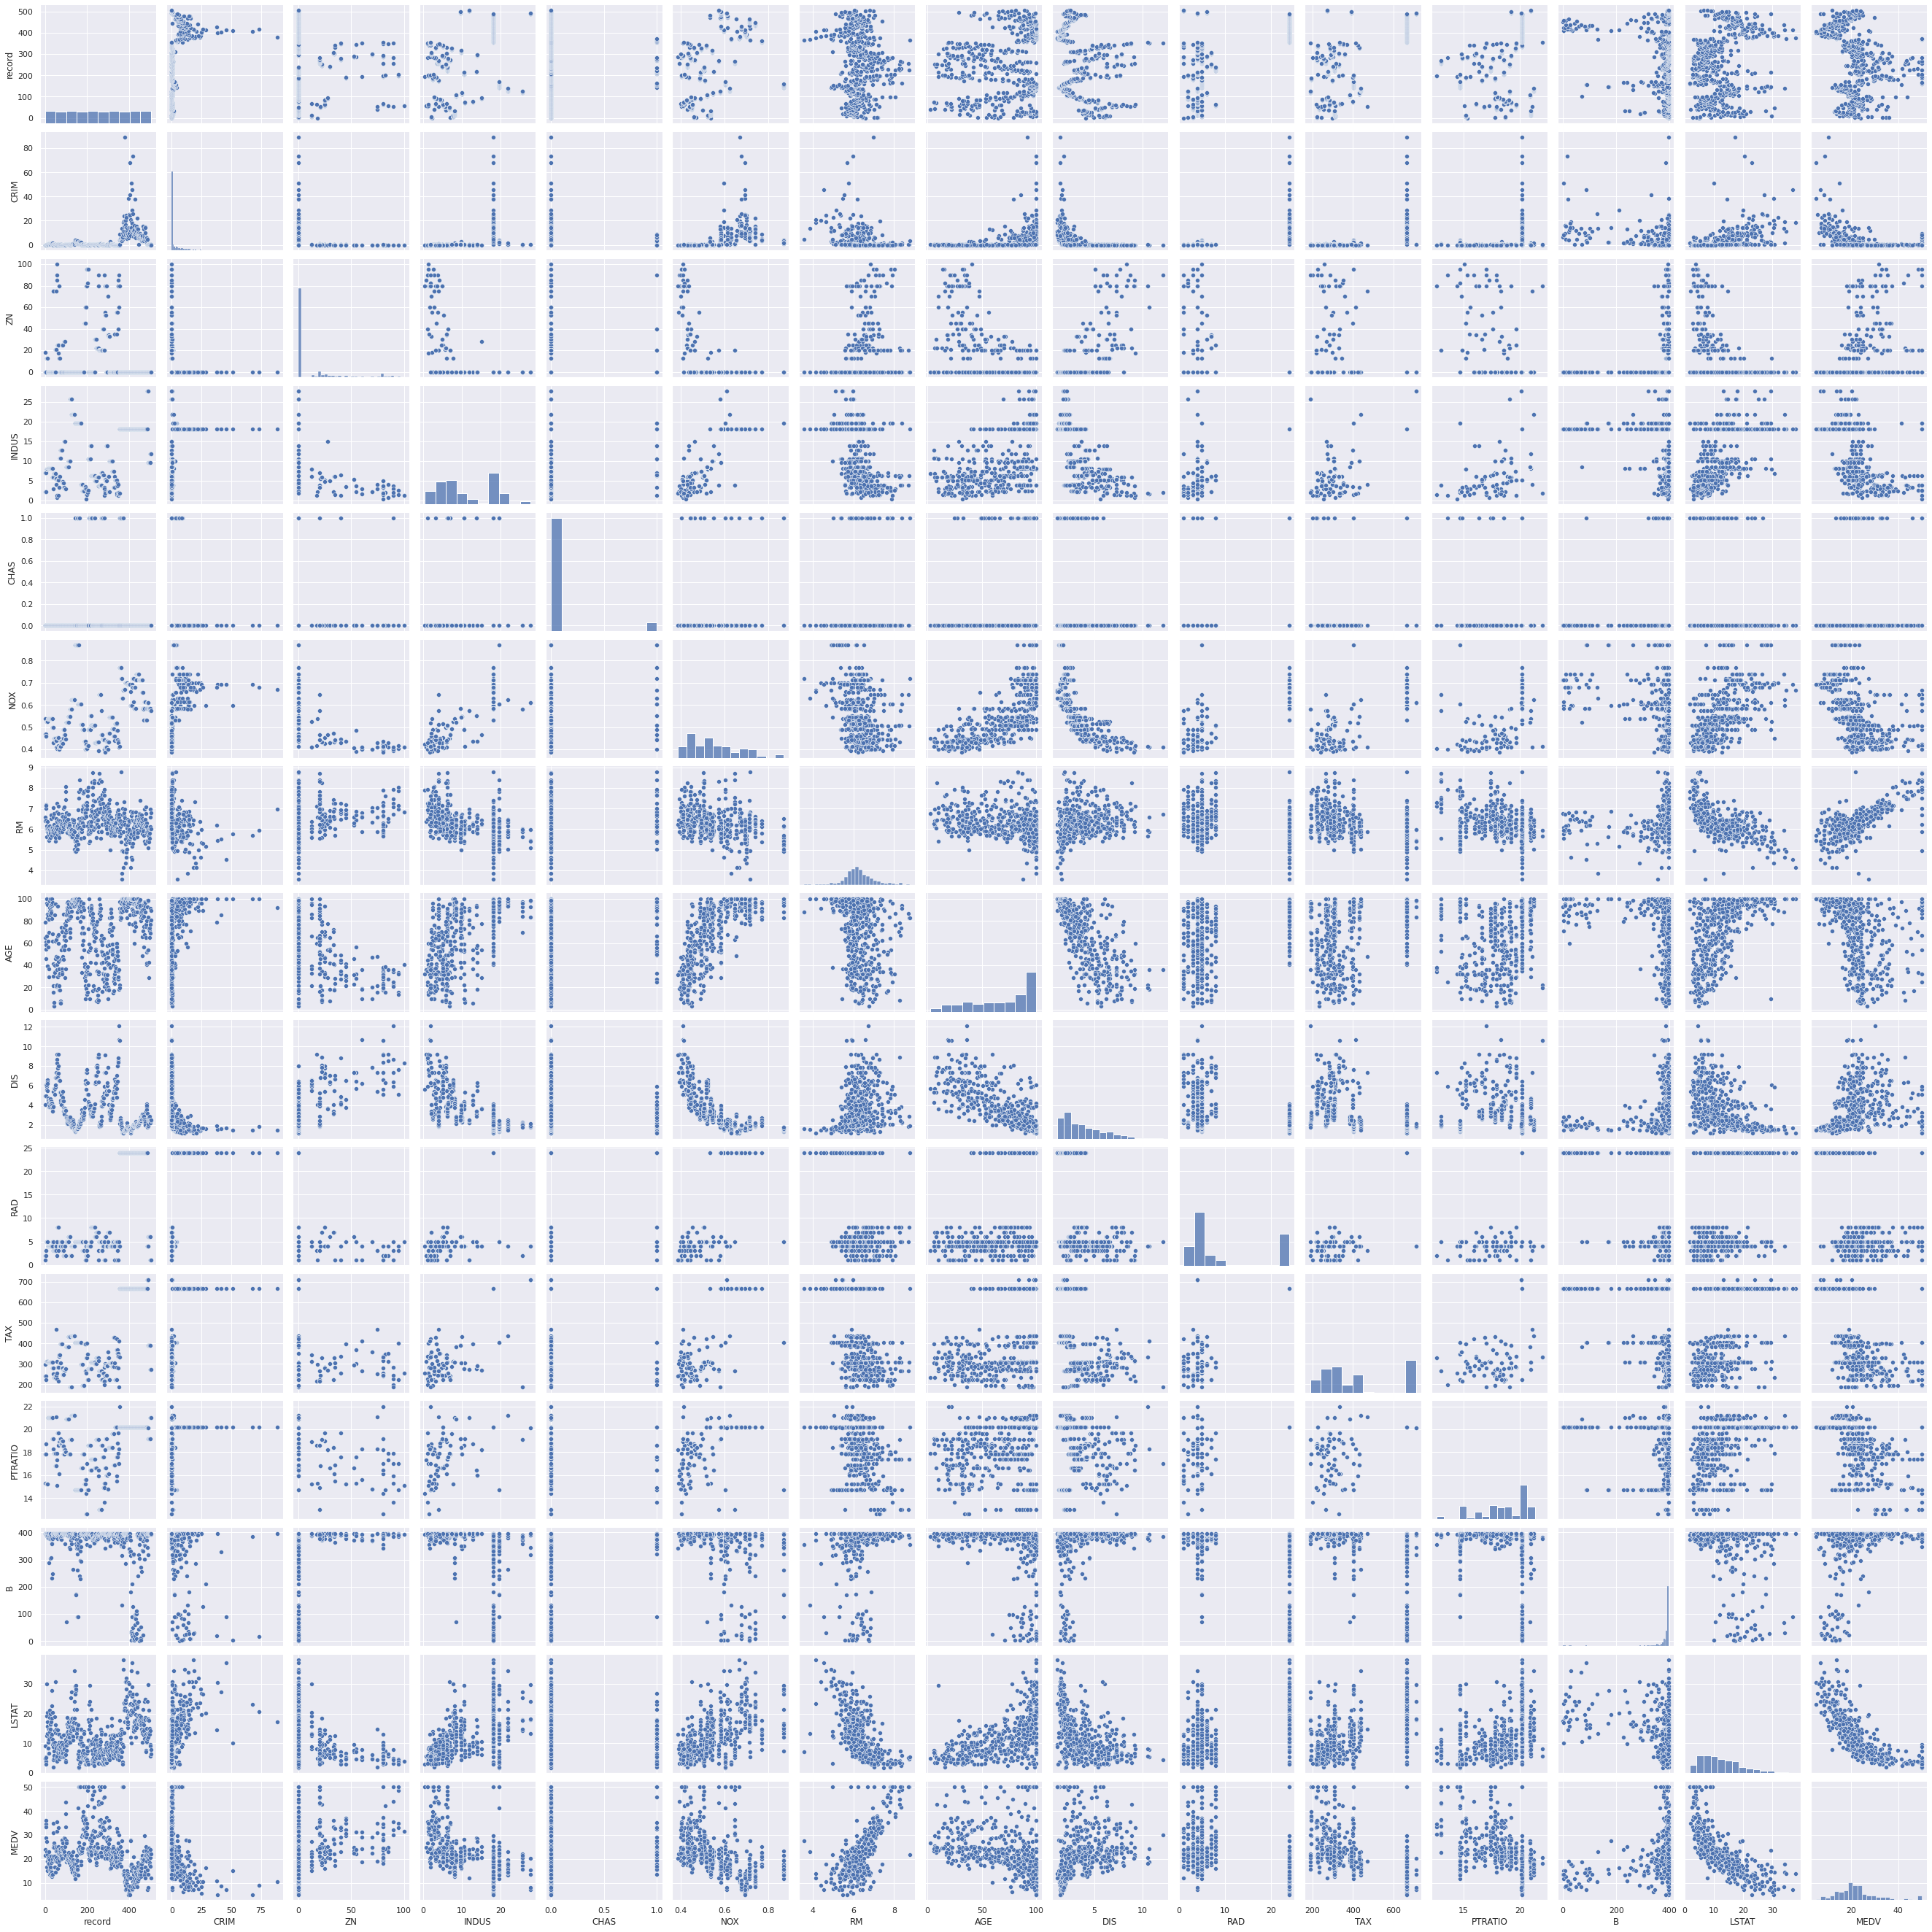

In [ ]:

df= pd.read_csv('/content/drive/MyDrive/dmdata/boston.csv')
sns.pairplot(data = df)

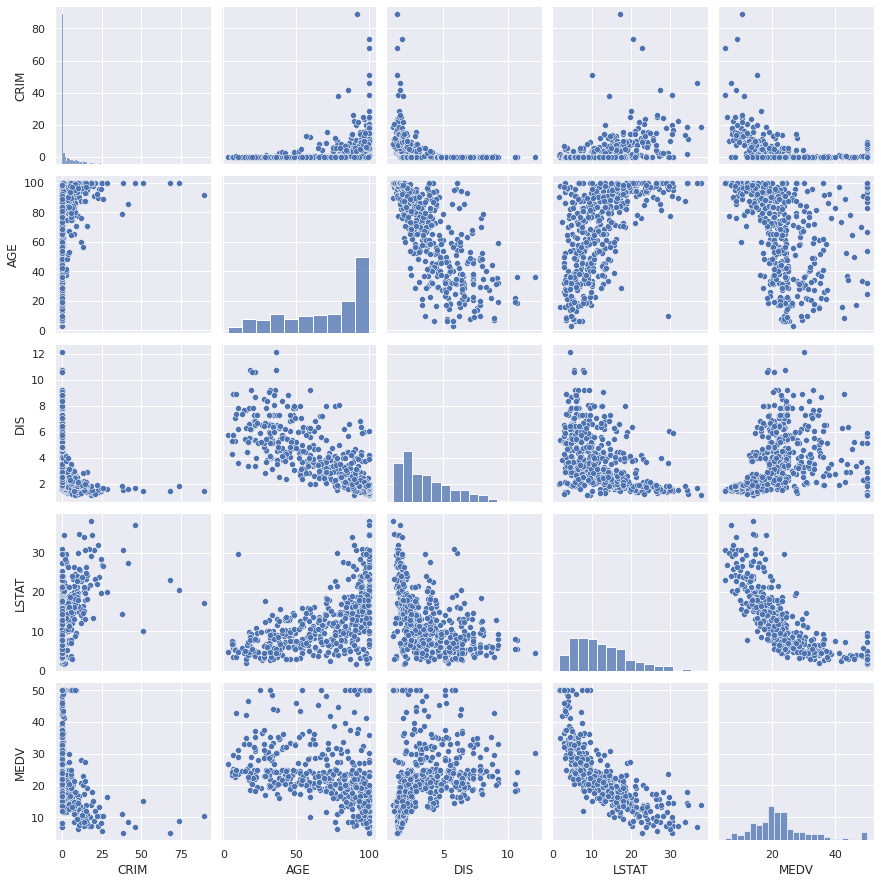

In [ ]:
# 선택된 특징을 보여주는 페어플롯
vars_to_plot = ['CRIM','AGE','DIS','LSTAT','MEDV']
sns.pairplot(data = df, vars = vars_to_plot)